# Natural Language Processing using LSTM

### Loading Dependencies

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import SimpleRNN 
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


### Loading Data

In [2]:
n_unique_words = 10000 
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

### Working with Data

In [3]:
max_review_length = 100
pad_type = trunc_type = 'pre'
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

### Creating the model

In [4]:
model = Sequential()
model.add(Embedding(n_unique_words, 64, input_length=max_review_length)) 
model.add(SpatialDropout1D(0.2))
model.add(SimpleRNN(256, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               82176     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


### Configure model

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Checkpoints

In [6]:
output_dir = 'model_output/SimpleRNN/'
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

### Training the model
SimpeRNN takes Longer to Learn!<br>
You will need 3x more Epochs

In [7]:
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 34s 1ms/step - loss: 0.6948 - acc: 0.5250 - val_loss: 0.7002 - val_acc: 0.5141
Epoch 2/20
25000/25000 [==============================] - 32s 1ms/step - loss: 0.6292 - acc: 0.6315 - val_loss: 0.6641 - val_acc: 0.5989
Epoch 3/20
25000/25000 [==============================] - 32s 1ms/step - loss: 0.5336 - acc: 0.7277 - val_loss: 0.6245 - val_acc: 0.6406
Epoch 4/20
25000/25000 [==============================] - 34s 1ms/step - loss: 0.4242 - acc: 0.8070 - val_loss: 0.6509 - val_acc: 0.6574
Epoch 5/20
25000/25000 [==============================] - 33s 1ms/step - loss: 0.4335 - acc: 0.7886 - val_loss: 0.6327 - val_acc: 0.6184
Epoch 6/20
25000/25000 [==============================] - 32s 1ms/step - loss: 0.4879 - acc: 0.7654 - val_loss: 0.6617 - val_acc: 0.6587
Epoch 7/20
25000/25000 [==============================] - 32s 1ms/step - loss: 0.3740 - acc: 0.8313 - val_loss: 0.7573 - val_acc

### Model Evaluation

In [8]:
model.load_weights(output_dir+"weights.09.hdf5")
y_hat = model.predict_proba(x_valid)

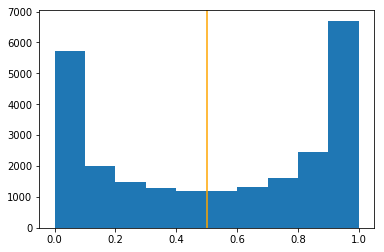

In [9]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [10]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'74.32'